In [1]:
import pandas as pd
import seaborn as sns
import prophet
import swifter
from prophet import Prophet
from tqdm import tqdm

In [2]:
df = pd.read_csv("/data/kaggle/tabular-playground-series-jan-2022/train.csv")

In [3]:
df_test = pd.read_csv("/data/kaggle/tabular-playground-series-jan-2022/test.csv")

In [4]:
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


# preprocess

We link country, store, product together

In [5]:
def link_store(row):
    sep = "___"
    store_name = row["country"] + sep + row["store"] + sep + row["product"].replace(" ", "x")
    row["store_name"] = store_name
    return row

In [6]:
df_small = df.head()

In [7]:
r1 = df_small.apply(link_store, axis=1)
r1.head()

,row_id,date,country,store,product,num_sold,store_name
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,Finland___KaggleMart___KagglexMug
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,Finland___KaggleMart___KagglexHat
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,Finland___KaggleMart___KagglexSticker
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,Finland___KaggleRama___KagglexMug
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,Finland___KaggleRama___KagglexHat


In [8]:
df2 = df.swifter.apply(link_store, axis=1)

In [9]:
df2.head()

,row_id,date,country,store,product,num_sold,store_name
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,Finland___KaggleMart___KagglexMug
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,Finland___KaggleMart___KagglexHat
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,Finland___KaggleMart___KagglexSticker
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,Finland___KaggleRama___KagglexMug
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,Finland___KaggleRama___KagglexHat


In [10]:
df2.shape

(26298, 7)

In [11]:
df3 = df2[["row_id", "date", "store_name", "num_sold"]]

In [12]:
df3.head()

,row_id,date,store_name,num_sold
0,0,2015-01-01,Finland___KaggleMart___KagglexMug,329
1,1,2015-01-01,Finland___KaggleMart___KagglexHat,520
2,2,2015-01-01,Finland___KaggleMart___KagglexSticker,146
3,3,2015-01-01,Finland___KaggleRama___KagglexMug,572
4,4,2015-01-01,Finland___KaggleRama___KagglexHat,911


In [13]:
df4 = df3[["date", "store_name", "num_sold"]]

In [14]:
df4.head()

,date,store_name,num_sold
0,2015-01-01,Finland___KaggleMart___KagglexMug,329
1,2015-01-01,Finland___KaggleMart___KagglexHat,520
2,2015-01-01,Finland___KaggleMart___KagglexSticker,146
3,2015-01-01,Finland___KaggleRama___KagglexMug,572
4,2015-01-01,Finland___KaggleRama___KagglexHat,911


In [15]:
df_pivot1 = pd.pivot_table(df4, index="date", columns="store_name", values="num_sold")

In [16]:
df_pivot1.head()

store_name,Finland___KaggleMart___KagglexHat,Finland___KaggleMart___KagglexMug,Finland___KaggleMart___KagglexSticker,Finland___KaggleRama___KagglexHat,Finland___KaggleRama___KagglexMug,Finland___KaggleRama___KagglexSticker,Norway___KaggleMart___KagglexHat,Norway___KaggleMart___KagglexMug,Norway___KaggleMart___KagglexSticker,Norway___KaggleRama___KagglexHat,Norway___KaggleRama___KagglexMug,Norway___KaggleRama___KagglexSticker,Sweden___KaggleMart___KagglexHat,Sweden___KaggleMart___KagglexMug,Sweden___KaggleMart___KagglexSticker,Sweden___KaggleRama___KagglexHat,Sweden___KaggleRama___KagglexMug,Sweden___KaggleRama___KagglexSticker
date,,,,,,,,,,,,,,,,,,
2015-01-01,520,329,146,911,572,283,906,526,250,1461,1005,395,624,440,175,1195,706,324
2015-01-02,493,318,127,794,544,249,845,538,237,1446,949,415,572,384,155,986,653,293
2015-01-03,535,360,141,843,579,265,930,614,254,1631,1029,451,630,420,173,1167,734,319
2015-01-04,544,332,125,873,582,245,889,589,255,1540,957,455,697,406,169,1112,657,300
2015-01-05,378,243,102,668,423,187,671,435,184,1126,739,310,442,298,127,796,512,227


# 2. model

In [17]:
m = Prophet()

In [18]:
list(df_pivot1.columns)

['Finland___KaggleMart___KagglexHat',
 'Finland___KaggleMart___KagglexMug',
 'Finland___KaggleMart___KagglexSticker',
 'Finland___KaggleRama___KagglexHat',
 'Finland___KaggleRama___KagglexMug',
 'Finland___KaggleRama___KagglexSticker',
 'Norway___KaggleMart___KagglexHat',
 'Norway___KaggleMart___KagglexMug',
 'Norway___KaggleMart___KagglexSticker',
 'Norway___KaggleRama___KagglexHat',
 'Norway___KaggleRama___KagglexMug',
 'Norway___KaggleRama___KagglexSticker',
 'Sweden___KaggleMart___KagglexHat',
 'Sweden___KaggleMart___KagglexMug',
 'Sweden___KaggleMart___KagglexSticker',
 'Sweden___KaggleRama___KagglexHat',
 'Sweden___KaggleRama___KagglexMug',
 'Sweden___KaggleRama___KagglexSticker']

In [19]:
df_pivot1.index

Index(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
       '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
       ...
       '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31'],
      dtype='object', name='date', length=1461)

In [20]:
df_sample = pd.DataFrame(data={"ds": df_pivot1.index, "y": df_pivot1["Finland___KaggleMart___KagglexHat"]})

In [21]:
m.fit(df_sample)

In [22]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05


In [23]:
df_test_date = df_test[["date"]]
df_test_date.columns = ["ds"]

In [24]:
df_forecast = m.predict(df_test_date)

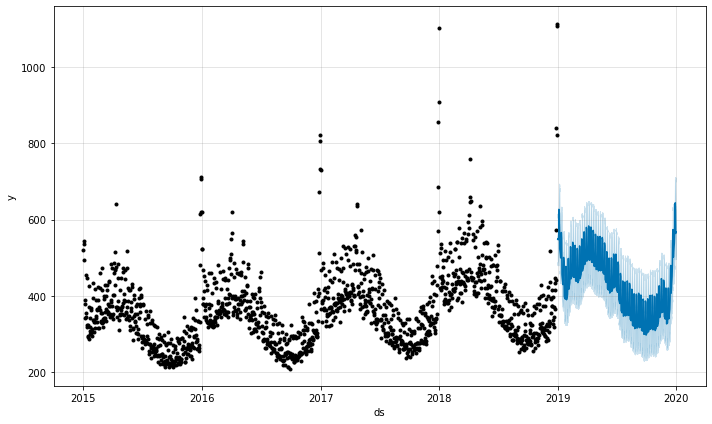

In [25]:
fig1 = m.plot(df_forecast)

## 2.1 Loop

In [26]:
model_dict = {}
train_dict = {}
forcase_dict = {}

In [27]:
store_name = "Finland___KaggleMart___KagglexHat"

In [28]:
df_test_date = df_test[["date"]]
df_test_date.columns = ["ds"]

In [29]:
df_process = pd.DataFrame(data={"ds": df_pivot1.index, "y": df_pivot1[store_name]})
model = Prophet()
model.fit(df_process)
df_test_date = df_test[["date"]]
df_test_date.columns = ["ds"]
df_forecast = m.predict(df_test_date)

In [30]:
def process_a_store(store_name, model_dict, train_dict, forcase_dict):
    df_process = pd.DataFrame(data={"ds": df_pivot1.index, "y": df_pivot1[store_name]})
    model = Prophet()
    model.fit(df_process)
    df_test_date = df_test[["date"]].drop_duplicates().reset_index().drop("index", axis=1)
    df_test_date.columns = ["ds"]
    df_forecast = model.predict(df_test_date)
    model_dict[store_name] = model
    train_dict[store_name] = df_process
    forcase_dict[store_name] = df_forecast
    return df_forecast

In [31]:
store_list = list(df_pivot1.columns)
store_list

['Finland___KaggleMart___KagglexHat',
 'Finland___KaggleMart___KagglexMug',
 'Finland___KaggleMart___KagglexSticker',
 'Finland___KaggleRama___KagglexHat',
 'Finland___KaggleRama___KagglexMug',
 'Finland___KaggleRama___KagglexSticker',
 'Norway___KaggleMart___KagglexHat',
 'Norway___KaggleMart___KagglexMug',
 'Norway___KaggleMart___KagglexSticker',
 'Norway___KaggleRama___KagglexHat',
 'Norway___KaggleRama___KagglexMug',
 'Norway___KaggleRama___KagglexSticker',
 'Sweden___KaggleMart___KagglexHat',
 'Sweden___KaggleMart___KagglexMug',
 'Sweden___KaggleMart___KagglexSticker',
 'Sweden___KaggleRama___KagglexHat',
 'Sweden___KaggleRama___KagglexMug',
 'Sweden___KaggleRama___KagglexSticker']

In [32]:
model_dict = {}
train_dict = {}
forcase_dict = {}
for store_name in tqdm(store_list):
    process_a_store(store_name, model_dict, train_dict, forcase_dict)
    print("done with ", store_name)

  6%|▌         | 1/18 [00:02<00:46,  2.75s/it]

done with  Finland___KaggleMart___KagglexHat


 11%|█         | 2/18 [00:05<00:41,  2.60s/it]

done with  Finland___KaggleMart___KagglexMug


 17%|█▋        | 3/18 [00:07<00:37,  2.51s/it]

done with  Finland___KaggleMart___KagglexSticker


 22%|██▏       | 4/18 [00:10<00:34,  2.47s/it]

done with  Finland___KaggleRama___KagglexHat


 28%|██▊       | 5/18 [00:12<00:31,  2.43s/it]

done with  Finland___KaggleRama___KagglexMug


 33%|███▎      | 6/18 [00:14<00:28,  2.40s/it]

done with  Finland___KaggleRama___KagglexSticker


 39%|███▉      | 7/18 [00:17<00:26,  2.41s/it]

done with  Norway___KaggleMart___KagglexHat


 44%|████▍     | 8/18 [00:19<00:23,  2.37s/it]

done with  Norway___KaggleMart___KagglexMug


 50%|█████     | 9/18 [00:22<00:21,  2.42s/it]

done with  Norway___KaggleMart___KagglexSticker


 56%|█████▌    | 10/18 [00:24<00:19,  2.39s/it]

done with  Norway___KaggleRama___KagglexHat


 61%|██████    | 11/18 [00:26<00:16,  2.39s/it]

done with  Norway___KaggleRama___KagglexMug


 67%|██████▋   | 12/18 [00:29<00:14,  2.40s/it]

done with  Norway___KaggleRama___KagglexSticker


 72%|███████▏  | 13/18 [00:31<00:11,  2.34s/it]

done with  Sweden___KaggleMart___KagglexHat


 78%|███████▊  | 14/18 [00:33<00:09,  2.35s/it]

done with  Sweden___KaggleMart___KagglexMug


 83%|████████▎ | 15/18 [00:36<00:07,  2.41s/it]

done with  Sweden___KaggleMart___KagglexSticker


 89%|████████▉ | 16/18 [00:38<00:04,  2.38s/it]

done with  Sweden___KaggleRama___KagglexHat


 94%|█████████▍| 17/18 [00:40<00:02,  2.37s/it]

done with  Sweden___KaggleRama___KagglexMug


100%|██████████| 18/18 [00:43<00:00,  2.40s/it]

done with  Sweden___KaggleRama___KagglexSticker


In [33]:
forcase_dict["Finland___KaggleMart___KagglexHat"].shape

(365, 19)

In [34]:
df_test_prepare = df_test[["date"]].drop_duplicates()
df_test_prepare.shape

(365, 1)

In [35]:
df_test_list = []
for store_name in tqdm(store_list):
    df_test_prepare = df_test[["date"]].drop_duplicates().reset_index().drop("index", axis=1)
    df_test_prepare["num_sold"] = forcase_dict[store_name]["yhat"]
    df_test_prepare["store_name"] = store_name
    df_test_list.append(df_test_prepare)

100%|██████████| 18/18 [00:00<00:00, 255.98it/s]


In [36]:
df_test_list[0].head()

,date,num_sold,store_name
0,2019-01-01,548.151102,Finland___KaggleMart___KagglexHat
1,2019-01-02,550.165233,Finland___KaggleMart___KagglexHat
2,2019-01-03,547.575335,Finland___KaggleMart___KagglexHat
3,2019-01-04,562.405910,Finland___KaggleMart___KagglexHat
4,2019-01-05,626.498677,Finland___KaggleMart___KagglexHat


In [37]:
df_test_prepare1 = pd.concat(df_test_list)

In [38]:
df_test_prepare1.shape

(6570, 3)

In [39]:
df_test.shape

(6570, 5)

In [40]:
df_test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [41]:
def unlink_store(row):
    sep = "___"
    # store_name = row["country"] + sep + row["store"] + sep + row["product"].replace(" ", "x")
    store_name = row["store_name"].split("___")
    row["country"] = store_name[0]
    row["store"] = store_name[1]
    row["product"] = store_name[2].replace("x", " ")
    return row

In [42]:
df_test_prepare2 = df_test_prepare1.swifter.apply(unlink_store, axis=1)

In [43]:
df_test_prepare2.head()

,date,num_sold,store_name,country,store,product
0,2019-01-01,548.151102,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat
1,2019-01-02,550.165233,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat
2,2019-01-03,547.575335,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat
3,2019-01-04,562.405910,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat
4,2019-01-05,626.498677,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat


In [44]:
df_test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [45]:
df_test_store_name = df_test.swifter.apply(link_store, axis=1)
df_test_store_name.head()

,row_id,date,country,store,product,store_name
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,Finland___KaggleMart___KagglexMug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat,Finland___KaggleMart___KagglexHat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker,Finland___KaggleMart___KagglexSticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug,Finland___KaggleRama___KagglexMug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat,Finland___KaggleRama___KagglexHat


In [46]:
df_test_store_name2 = df_test_store_name[["row_id", "date", "store_name"]]

In [47]:
df_sub_1 = pd.merge(df_test_prepare2, df_test_store_name2, on=["date", "store_name"])

In [48]:
df_test_prepare2.shape

(6570, 6)

In [49]:
df_test_store_name2.head()

,row_id,date,store_name
0,26298,2019-01-01,Finland___KaggleMart___KagglexMug
1,26299,2019-01-01,Finland___KaggleMart___KagglexHat
2,26300,2019-01-01,Finland___KaggleMart___KagglexSticker
3,26301,2019-01-01,Finland___KaggleRama___KagglexMug
4,26302,2019-01-01,Finland___KaggleRama___KagglexHat


In [50]:
df_sub_1.head()

,date,num_sold,store_name,country,store,product,row_id
0,2019-01-01,548.151102,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26299
1,2019-01-02,550.165233,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26317
2,2019-01-03,547.575335,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26335
3,2019-01-04,562.405910,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26353
4,2019-01-05,626.498677,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26371


In [51]:
df_sub_2 = df_sub_1[["row_id", "num_sold"]]

In [52]:
df_sub_3 = df_sub_2.fillna(0)

In [53]:
df_sub_3.to_csv("sub/submission_model_1_fix1.csv", index=False)

In [54]:
df_sub_2.shape

(6570, 2)

In [55]:
df_sub_2.head()

,row_id,num_sold
0,26299,548.151102
1,26317,550.165233
2,26335,547.575335
3,26353,562.405910
4,26371,626.498677


# Check why null ?

In [56]:
df_sub_1[df_sub_1["num_sold"].isna()]

,date,num_sold,store_name,country,store,product,row_id


In [57]:
df_sub_na = df_sub_1[df_sub_1["num_sold"].isna()]

In [58]:
len(df_sub_1[df_sub_1["num_sold"].isna()])

0

In [59]:
len(df_sub_1)

6570

In [60]:
df_sub_na["store_name"].unique()

array([], dtype=object)

In [61]:
list(df_sub_na["store_name"].unique())

[]

In [62]:
forcase_dict.keys()

dict_keys(['Finland___KaggleMart___KagglexHat', 'Finland___KaggleMart___KagglexMug', 'Finland___KaggleMart___KagglexSticker', 'Finland___KaggleRama___KagglexHat', 'Finland___KaggleRama___KagglexMug', 'Finland___KaggleRama___KagglexSticker', 'Norway___KaggleMart___KagglexHat', 'Norway___KaggleMart___KagglexMug', 'Norway___KaggleMart___KagglexSticker', 'Norway___KaggleRama___KagglexHat', 'Norway___KaggleRama___KagglexMug', 'Norway___KaggleRama___KagglexSticker', 'Sweden___KaggleMart___KagglexHat', 'Sweden___KaggleMart___KagglexMug', 'Sweden___KaggleMart___KagglexSticker', 'Sweden___KaggleRama___KagglexHat', 'Sweden___KaggleRama___KagglexMug', 'Sweden___KaggleRama___KagglexSticker'])

In [63]:
forcase_dict["Finland___KaggleMart___KagglexSticker"]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,120.150835,139.910146,173.378608,120.150835,120.150835,36.156412,36.156412,36.156412,-7.946619,-7.946619,-7.946619,44.103031,44.103031,44.103031,0.0,0.0,0.0,156.307247
1,2019-01-02,120.174638,139.824850,174.386869,120.174638,120.174638,36.320677,36.320677,36.320677,-7.276205,-7.276205,-7.276205,43.596882,43.596882,43.596882,0.0,0.0,0.0,156.495315
2,2019-01-03,120.198440,138.889167,173.742491,120.198440,120.198440,36.264064,36.264064,36.264064,-6.388071,-6.388071,-6.388071,42.652135,42.652135,42.652135,0.0,0.0,0.0,156.462504
3,2019-01-04,120.222242,140.143553,175.399400,120.222242,120.222242,38.605754,38.605754,38.605754,-2.683388,-2.683388,-2.683388,41.289142,41.289142,41.289142,0.0,0.0,0.0,158.827996
4,2019-01-05,120.246044,159.233683,193.620679,120.246044,120.246044,55.672029,55.672029,55.672029,16.136502,16.136502,16.136502,39.535527,39.535527,39.535527,0.0,0.0,0.0,175.918074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,128.719643,148.890631,184.014371,127.011473,130.243780,36.723418,36.723418,36.723418,-2.683388,-2.683388,-2.683388,39.406806,39.406806,39.406806,0.0,0.0,0.0,165.443061
361,2019-12-28,128.743445,168.941520,203.518988,127.030575,130.278681,57.357913,57.357913,57.357913,16.136502,16.136502,16.136502,41.221410,41.221410,41.221410,0.0,0.0,0.0,186.101357
362,2019-12-29,128.767247,169.929061,205.001602,127.049678,130.313010,58.550411,58.550411,58.550411,15.928682,15.928682,15.928682,42.621729,42.621729,42.621729,0.0,0.0,0.0,187.317658
363,2019-12-30,128.791049,147.420134,181.447663,127.069296,130.344924,35.815145,35.815145,35.815145,-7.770901,-7.770901,-7.770901,43.586046,43.586046,43.586046,0.0,0.0,0.0,164.606194


In [64]:
forcase_dict["Finland___KaggleMart___KagglexSticker"]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,120.150835,139.910146,173.378608,120.150835,120.150835,36.156412,36.156412,36.156412,-7.946619,-7.946619,-7.946619,44.103031,44.103031,44.103031,0.0,0.0,0.0,156.307247
1,2019-01-02,120.174638,139.824850,174.386869,120.174638,120.174638,36.320677,36.320677,36.320677,-7.276205,-7.276205,-7.276205,43.596882,43.596882,43.596882,0.0,0.0,0.0,156.495315
2,2019-01-03,120.198440,138.889167,173.742491,120.198440,120.198440,36.264064,36.264064,36.264064,-6.388071,-6.388071,-6.388071,42.652135,42.652135,42.652135,0.0,0.0,0.0,156.462504
3,2019-01-04,120.222242,140.143553,175.399400,120.222242,120.222242,38.605754,38.605754,38.605754,-2.683388,-2.683388,-2.683388,41.289142,41.289142,41.289142,0.0,0.0,0.0,158.827996
4,2019-01-05,120.246044,159.233683,193.620679,120.246044,120.246044,55.672029,55.672029,55.672029,16.136502,16.136502,16.136502,39.535527,39.535527,39.535527,0.0,0.0,0.0,175.918074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,128.719643,148.890631,184.014371,127.011473,130.243780,36.723418,36.723418,36.723418,-2.683388,-2.683388,-2.683388,39.406806,39.406806,39.406806,0.0,0.0,0.0,165.443061
361,2019-12-28,128.743445,168.941520,203.518988,127.030575,130.278681,57.357913,57.357913,57.357913,16.136502,16.136502,16.136502,41.221410,41.221410,41.221410,0.0,0.0,0.0,186.101357
362,2019-12-29,128.767247,169.929061,205.001602,127.049678,130.313010,58.550411,58.550411,58.550411,15.928682,15.928682,15.928682,42.621729,42.621729,42.621729,0.0,0.0,0.0,187.317658
363,2019-12-30,128.791049,147.420134,181.447663,127.069296,130.344924,35.815145,35.815145,35.815145,-7.770901,-7.770901,-7.770901,43.586046,43.586046,43.586046,0.0,0.0,0.0,164.606194


In [65]:
check1 =  forcase_dict["Finland___KaggleMart___KagglexSticker"]

In [66]:
check1[check1["yhat"].isna()]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


In [67]:
df_test_prepare1.head()

,date,num_sold,store_name
0,2019-01-01,548.151102,Finland___KaggleMart___KagglexHat
1,2019-01-02,550.165233,Finland___KaggleMart___KagglexHat
2,2019-01-03,547.575335,Finland___KaggleMart___KagglexHat
3,2019-01-04,562.405910,Finland___KaggleMart___KagglexHat
4,2019-01-05,626.498677,Finland___KaggleMart___KagglexHat


In [68]:
df_test_prepare1[df_test_prepare1["num_sold"].isna()]

,date,num_sold,store_name


In [69]:
len(df_test_prepare1)

6570

In [70]:
df_test_prepare1["store_name"].unique()

array(['Finland___KaggleMart___KagglexHat',
       'Finland___KaggleMart___KagglexMug',
       'Finland___KaggleMart___KagglexSticker',
       'Finland___KaggleRama___KagglexHat',
       'Finland___KaggleRama___KagglexMug',
       'Finland___KaggleRama___KagglexSticker',
       'Norway___KaggleMart___KagglexHat',
       'Norway___KaggleMart___KagglexMug',
       'Norway___KaggleMart___KagglexSticker',
       'Norway___KaggleRama___KagglexHat',
       'Norway___KaggleRama___KagglexMug',
       'Norway___KaggleRama___KagglexSticker',
       'Sweden___KaggleMart___KagglexHat',
       'Sweden___KaggleMart___KagglexMug',
       'Sweden___KaggleMart___KagglexSticker',
       'Sweden___KaggleRama___KagglexHat',
       'Sweden___KaggleRama___KagglexMug',
       'Sweden___KaggleRama___KagglexSticker'], dtype=object)

In [71]:
check11 = df_test_prepare1[df_test_prepare1["store_name"]=="Norway___KaggleRama___KagglexHat"]

In [72]:
len(check11)

365

In [73]:
check11[check11["num_sold"].isna()]

,date,num_sold,store_name


In [74]:
forcase_dict["Norway___KaggleRama___KagglexHat"]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,1181.554856,1315.487092,1657.211688,1181.554856,1181.554856,309.090182,309.090182,309.090182,-82.346908,-82.346908,-82.346908,391.437090,391.437090,391.437090,0.0,0.0,0.0,1490.645038
1,2019-01-02,1181.708227,1320.217058,1665.540951,1181.708227,1181.708227,314.389910,314.389910,314.389910,-74.535318,-74.535318,-74.535318,388.925228,388.925228,388.925228,0.0,0.0,0.0,1496.098136
2,2019-01-03,1181.861598,1329.970914,1675.454783,1181.861598,1181.861598,309.395545,309.395545,309.395545,-72.811549,-72.811549,-72.811549,382.207095,382.207095,382.207095,0.0,0.0,0.0,1491.257143
3,2019-01-04,1182.014969,1352.510931,1704.729215,1182.014969,1182.014969,344.704829,344.704829,344.704829,-26.787737,-26.787737,-26.787737,371.492565,371.492565,371.492565,0.0,0.0,0.0,1526.719798
4,2019-01-05,1182.168340,1531.749275,1866.691688,1182.168340,1182.168340,526.898312,526.898312,526.898312,169.835597,169.835597,169.835597,357.062715,357.062715,357.062715,0.0,0.0,0.0,1709.066652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,1236.768444,1352.969702,1714.427335,1196.626091,1273.089675,306.888157,306.888157,306.888157,-26.787737,-26.787737,-26.787737,333.675894,333.675894,333.675894,0.0,0.0,0.0,1543.656602
361,2019-12-28,1236.921816,1577.249349,1940.736383,1196.576138,1273.419961,523.420401,523.420401,523.420401,169.835597,169.835597,169.835597,353.584804,353.584804,353.584804,0.0,0.0,0.0,1760.342217
362,2019-12-29,1237.075187,1581.683438,1960.524445,1196.582267,1273.750248,532.203973,532.203973,532.203973,162.727909,162.727909,162.727909,369.476064,369.476064,369.476064,0.0,0.0,0.0,1769.279159
363,2019-12-30,1237.228558,1366.775438,1721.726061,1196.619957,1274.080145,305.063257,305.063257,305.063257,-76.081994,-76.081994,-76.081994,381.145251,381.145251,381.145251,0.0,0.0,0.0,1542.291814


## try something

In [75]:
store_name = "Norway___KaggleRama___KagglexHat"
df_meow = df_test[["date"]].drop_duplicates().reset_index().drop("index", axis=1)
# df_meow["num_sold"] = forcase_dict[store_name]["yhat"]
# df_meow["store_name"] = store_name

In [76]:
df_meow.head()

,date
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05


In [77]:
df_meow["num_sold"] = forcase_dict[store_name]["yhat"]
df_meow["store_name"] = store_name

In [78]:
df_meow[df_meow["num_sold"].isna()].head()

,date,num_sold,store_name


In [79]:
# df_meow.reset_index()

In [80]:
df_meow["num_sold"]  = forcase_dict[store_name]["yhat"]

In [81]:
df_meow

,date,num_sold,store_name
0,2019-01-01,1490.645038,Norway___KaggleRama___KagglexHat
1,2019-01-02,1496.098136,Norway___KaggleRama___KagglexHat
2,2019-01-03,1491.257143,Norway___KaggleRama___KagglexHat
3,2019-01-04,1526.719798,Norway___KaggleRama___KagglexHat
4,2019-01-05,1709.066652,Norway___KaggleRama___KagglexHat
...,...,...,...
360,2019-12-27,1543.656602,Norway___KaggleRama___KagglexHat
361,2019-12-28,1760.342217,Norway___KaggleRama___KagglexHat
362,2019-12-29,1769.279159,Norway___KaggleRama___KagglexHat
363,2019-12-30,1542.291814,Norway___KaggleRama___KagglexHat
